# Calibration, volatilité locale et stochastique - TP
M2 Probabilités et Finance 

Stefano De Marco

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Calibration of an implied volatility parameterization to a market smile

#### Let us load a dataset of SPX implied volatilities

We consider end-of-day option quotes for the SPX stock index, observation date = Mon Jan 29 2024, and expiration Date = Fri Feb 16 2024.

$\blacktriangleright$ We import the values of log-moneyness $k = \log \frac K {F}$ and the implied volatilities from the csv file *SPX_vol_quotes.csv*.

A side note: the notebook that constructs the values of implied volatility in the source file *SPX_vol_quotes.csv* starting from SPX option quotes downloaded from the CBOE Delayed Quotes webpage is also provided on Moodle (you can check it out after completing the present notebook).

In [3]:
quotes = np.loadtxt(open("SPX_vol_quotes.csv", "r"), delimiter=";")

print("quotes.shape : ", quotes.shape)

mkt_log_mon = quotes[0]
vols_calls = quotes[1]
    
# We only have one option maturity, equal to 18 days
maturity = 18/365

print("\n Maturity (in years): %1.2f" %maturity)

print("\n Log moneyness: ", mkt_log_mon)
print("Implied vols from calls mid prices: ", vols_calls)

quotes.shape :  (2, 229)

 Maturity (in years): 0.05

 Log moneyness:  [-5.80914744e-01 -5.45196661e-01 -5.27804918e-01 -5.19221175e-01
 -5.10710485e-01 -5.02271616e-01 -4.93903367e-01 -4.77374065e-01
 -4.61113544e-01 -4.37208023e-01 -4.13860659e-01 -4.06197786e-01
 -3.98593187e-01 -3.91045981e-01 -3.83555309e-01 -3.76120331e-01
 -3.68740224e-01 -3.61414183e-01 -3.54141424e-01 -3.46921176e-01
 -3.39752687e-01 -3.22755110e-01 -3.19950059e-01 -3.11581810e-01
 -2.90962523e-01 -2.84182836e-01 -2.77448803e-01 -2.68096698e-01
 -2.64115273e-01 -2.57514588e-01 -2.49650852e-01 -2.31539102e-01
 -2.18800076e-01 -2.12490907e-01 -2.06221294e-01 -1.99990744e-01
 -1.93798774e-01 -1.81528681e-01 -1.75449635e-01 -1.74238248e-01
 -1.71819867e-01 -1.69407321e-01 -1.63401297e-01 -1.62204409e-01
 -1.57431130e-01 -1.55053008e-01 -1.52680527e-01 -1.51496394e-01
 -1.50313662e-01 -1.46773835e-01 -1.45596672e-01 -1.39731553e-01
 -1.33900633e-01 -1.32738517e-01 -1.29260253e-01 -1.28103515e-01
 -1.25794045e-01 -1

Let us plot the implied volatility smile in terms of the log-forward moneyness $k = \log(K / F_0^T)$:

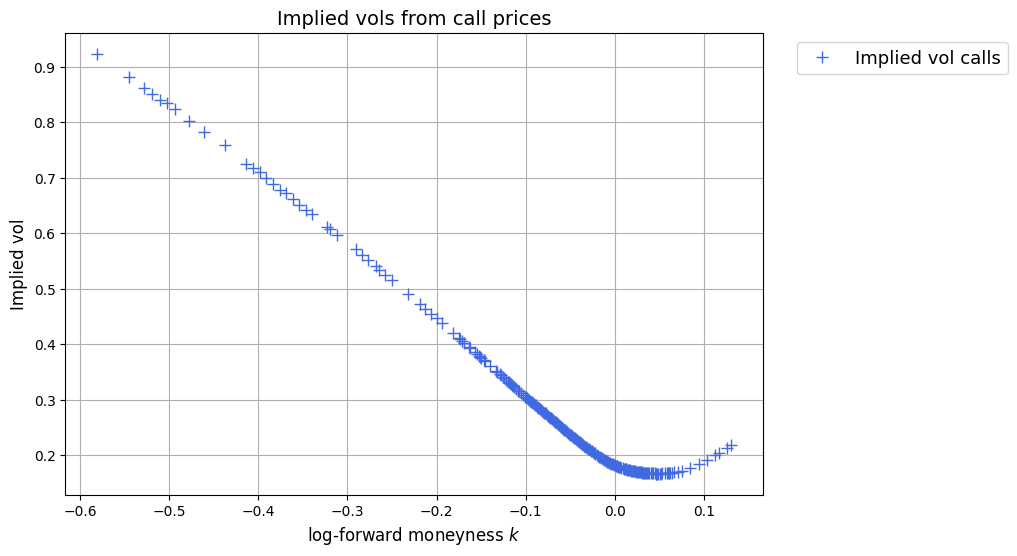

In [5]:
plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, vols_calls,
         color='royalblue', linewidth=0., marker="+", markersize=8, label="Implied vol calls")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title("Implied vols from call prices", fontsize=14)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.2, 1.0), ncol=1)
plt.grid()
plt.show()

## The SVI parameterisation

#### $\blacktriangleright$ Implied total variance $w(T,k)$

We recall that the implied total variance $w(T,k)$ for maturity $T$ and log-forward moneyness $k = \log \frac K {F}$ is defined by

$$
w(T,k) = T \, \hat \sigma^2(T, k)
$$

where $\hat \sigma(T, k)$ is the implied volatility for the same maturity and the same log-forward moneyness.


#### $\blacktriangleright$ The SVI (Stochastic Volatility Inspired) parameterisation

SVI is a parametric family of functions proposed by Gatheral in 2004  in order to model the total implied variance smile for a fixed maturity $T$ :

\begin{equation}
w_\mathrm{SVI}(k) = a + b \left(\rho (k - \bar k) + \sqrt{(k - \bar k)^2 + \sigma^2} \right),
\qquad k \in \mathbb R,
\end{equation}

where the parameters $(a, b, \rho, \bar k, \sigma)$ satisfy

$$
b > 0 \qquad \quad \rho \in [-1,1] \qquad \quad \sigma > 0, \qquad \quad a, \bar k \in \mathbb R.
$$

Note that, since $\min_{k \in \mathbb R} w_\mathrm{SVI}(k) = a + b \, \sigma \, \sqrt{1 - \rho^2}$, we also have to impose the condition

$$
a + b \, \sigma \, \sqrt{1 - \rho^2} > 0
$$

in order to grant positivity of the function $w_\mathrm{SVI}$.

### To Do: fit an SVI parameterisation to the market quotes

We want to find a parameter set $(a^*, b^*, \rho^*, \bar k^*, \sigma^*)$ that best fits the values $w^{\mathrm{mkt}}$ observed in the market, for the given maturity $T$.

We formulate this calibration problem as a least-square problem:

$$
\min_{(a, \, b, \, \rho,\, \bar k,\, \sigma)}
\sum_{i} \left( w^{\mathrm{mkt}}(k_i) - w_\mathrm{SVI} \left(k_i \, ; a,b,\rho,\bar k,\sigma \right) \right)^2
$$

where the $k_i$ are the observed log-moneyness points and $w^{\mathrm{mkt}}(k_i) = T \bigl( \hat \sigma^{\mathrm{mkt}}(T, k_i) \bigr)^2$ the observed values of the total implied variance.

Since we want to minimize over admissible parameters $(a, \, b, \, \rho,\, \bar k,\, \sigma)$, this is a __constrained optimization problem__. We can distinguish between:

$\blacktriangleright$ __Structural constraints__ on the parameters that are easy to impose (they are "box-type constraints"):

$$
b > 0 \qquad \quad \rho \in [-1,1] \qquad \quad \sigma > 0.
$$

The positivity constraint of $w_{\mathrm{SVI}}$

$$
a + b \, \sigma \, \sqrt{1 - \rho^2} > 0
$$

is slightly more involved (in the sense that it defines a set in the space for the parameters $(a,b,\rho,\sigma)$ that is not a product of intervals).

To begin with, we decide to replace the positivity constraint $a + b \, \sigma \, \sqrt{1 - \rho^2} > 0$ with the condition

$$
a > 0
$$

which is stronger (in view of the other conditions on $b$, $\rho$ and $\sigma$), but we accept to make this restriction.

We will also cap the parameters $a,b,\sigma$ at some reasonably high levels $a_{\mathrm{max}}, b_{\mathrm{max}}, \sigma_{\mathrm{max}}$.

$\blacktriangleright$ __No-arbitrage constraints (preventing Butterfly arbitrage for the given maturity $T$)__.
We would like to guarantee that the interpolation and extrapolation of the observed market variances provided by the function $w_\mathrm{SVI}$ does not generate arbitrage. 

We know from the lectures that the conditions are the following (now expressed in terms of total implied variance $w$ instead of total implied volatility $v$) :

(1) The call price $K \mapsto Call_{\mathrm{BS}} \Bigl(T, K, F_0^T, D(0,T), \frac 1{\sqrt{T}} \sqrt{w_\mathrm{SVI} \Bigl(\log \frac K{F_0^T}\Bigr)} \Bigr)$ is a convex function of $K$,

(3) $\lim_{k\to \infty} \left(\frac{-k}{\sqrt{w_\mathrm{SVI}(k)}} + \frac{\sqrt{w_\mathrm{SVI}(k)}}2 \right)= -\infty$

where we have used the numbering of the conditions from the lectures.

$\blacktriangleright$ In this notebook, for the moment we simply accept to neglect such no-arbitrage constraints and fit the SVI parameterisation as it is (taking into account only the ''structural constraints" above); the goal is to see how SVI performs (and go back to the no-arbitrage conditions afterwards, in a second notebook that is also provided on Moodle---if time permits!).

#### We  make a try with the function least_squares from the library scipy.optimize

Let us implement the SVI formula.

In [8]:
def SVI(k, a, b , rho, k_bar, sig):
    total_variance = a + b * (rho * (k - k_bar) + np.sqrt((k - k_bar)**2 + sig**2)) 
    
    return total_variance

Let us have a look at the behavior of the SVI parameterization.

In [6]:
####################
# A parameter set
####################
a = 0.04
b = 0.4
rho = -0.7
k_bar = 0.1
sig = 0.2

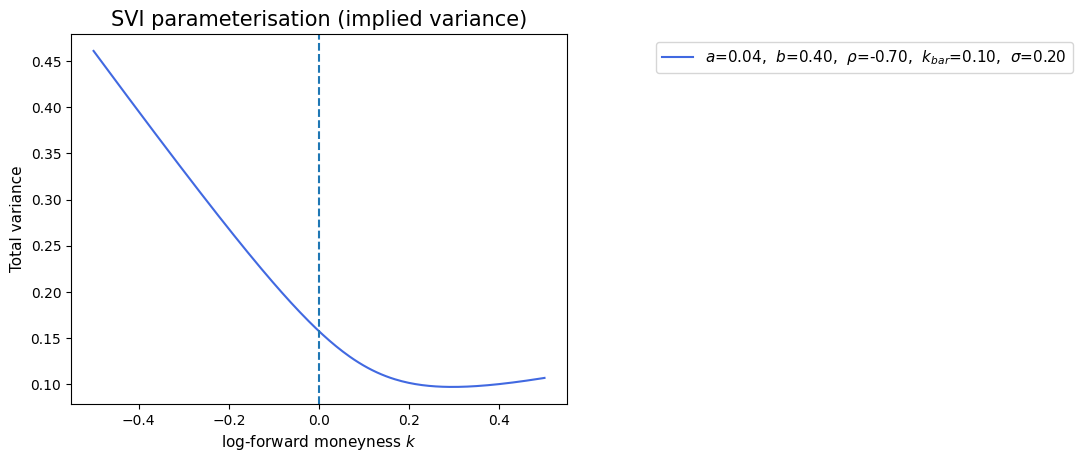

In [9]:
#############################################
## TO DO: initialise and plot a SVI slice
#############################################
log_moneyness = np.linspace(-0.5, 0.5, 200)

total_variances = SVI(log_moneyness, a, b , rho, k_bar, sig)

plt.plot(log_moneyness, total_variances, color='royalblue', linewidth=1.5, \
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a,b,rho,k_bar,sig))

plt.axvline(0., linestyle="--")

plt.xlabel("log-forward moneyness $k$", fontsize=11)
plt.ylabel("Total variance", fontsize=11)
plt.title(r"SVI parameterisation (implied variance)", fontsize=15)

plt.legend(loc=9, fontsize=11, bbox_to_anchor=(1.6, 1.0), ncol=1)

In the following cell, we define the loss function to be used in our least-square calibration problem.

In [11]:
def SVI_two_arguments(theta, k):
    ## Attention à l'ordre des paramètres...
    a, b , rho, k_bar, sig = theta
    
    return SVI(k, a, b , rho, k_bar, sig)

# Loss function
def fct_least_squares(theta, log_mon, tot_implied_variance):
    """
    theta                : the vector of SVI parameters
    log_mon              : log-forward moneyness k (float or double)
    tot_implied_variance : the target total implied variance (float or double)
    
    Returns : the objective function (without the square) to be injected
    in the least-square problem
    """
    return SVI_two_arguments(theta, log_mon) - tot_implied_variance

$\blacktriangleright$  We have to choose a starting point for the minimum search: the following one is reasonable, but we could also try with another one.

In [12]:
## Recall that our target is the vector of total variances from (call or put) price quotes
mkt_tot_variance = maturity * vols_calls**2

## Choice of initial point
a_init = np.min(mkt_tot_variance) / 2
b_init = 0.1
rho_init = -0.8
k_bar_init = 0.
sig_init = 0.1

$\blacktriangleright$ Let us have a look at our initial guess for SVI:

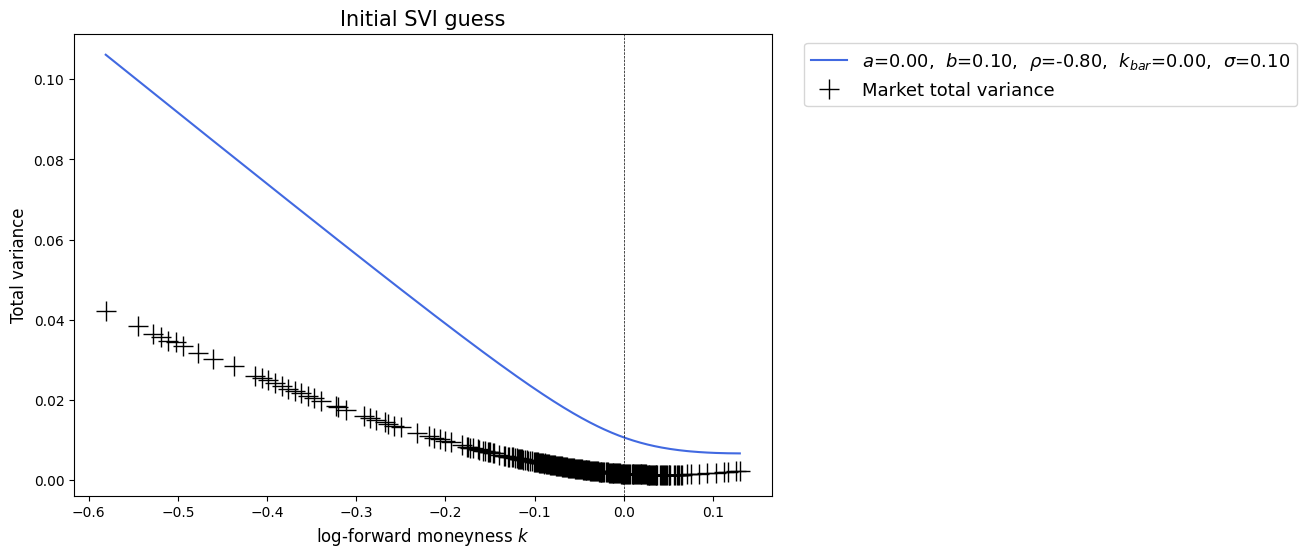

In [14]:
################################
## Plot of the initial SVI guess
################################
plt.figure(figsize=(9,6))

total_variances_init = SVI(mkt_log_mon, a_init, b_init, rho_init, k_bar_init, sig_init)

plt.plot(mkt_log_mon, total_variances_init,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_init,b_init,rho_init,k_bar_init,sig_init))

plt.plot(mkt_log_mon, vols_calls**2 * maturity,
         color='black', linewidth=0., marker="+", markersize=14, label="Market total variance")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Total variance", fontsize=12)
plt.title(r"Initial SVI guess", fontsize=15)

plt.legend(loc=9, fontsize=13, bbox_to_anchor=(1.4, 1.0), ncol=1)

#### $\blacktriangleright$ TO DO: run the function least_squares from scipy.optimize

In [16]:
############################################################
## Here we code the bounds we impose on the SVI parameters
## 
## Reminder: the order is a, b , rho, k_bar, sig
############################################################
lower = np.array([0.,   # a
                  0.,   # b
                  -1.,  # rho
                  -0.5, # k_bar
                  0.])  # sigma

upper = np.array([1., # a
                  2.,  # b
                  1.,  # rho
                  0.5, # k_bar
                  1.]) # sigma

SVI_param_bounds = (lower, upper)

theta_init = np.array([a_init, b_init, rho_init, k_bar_init, sig_init])

###################################################################
## TO DO: apply the least squares method
## 
## - to the objective function to be minimized
## - using theta_init as the starting point for the search
## - imposing the bounds we defined above
###################################################################
import scipy.optimize as opt

result = opt.least_squares(fun = fct_least_squares,
                           x0 = theta_init, 
                           bounds = SVI_param_bounds,
                           args = (mkt_log_mon, mkt_tot_variance), #additional arguments for the LS objective
                           verbose = 1)

## The optimized parameters
a_star, b_star, rho_star, k_bar_star, sig_star = result.x

`gtol` termination condition is satisfied.
Function evaluations 14, initial cost 5.7893e-02, final cost 1.3951e-05, first-order optimality 5.04e-09.


$\blacktriangleright$ Have a look at our SVI fit of implied variance:

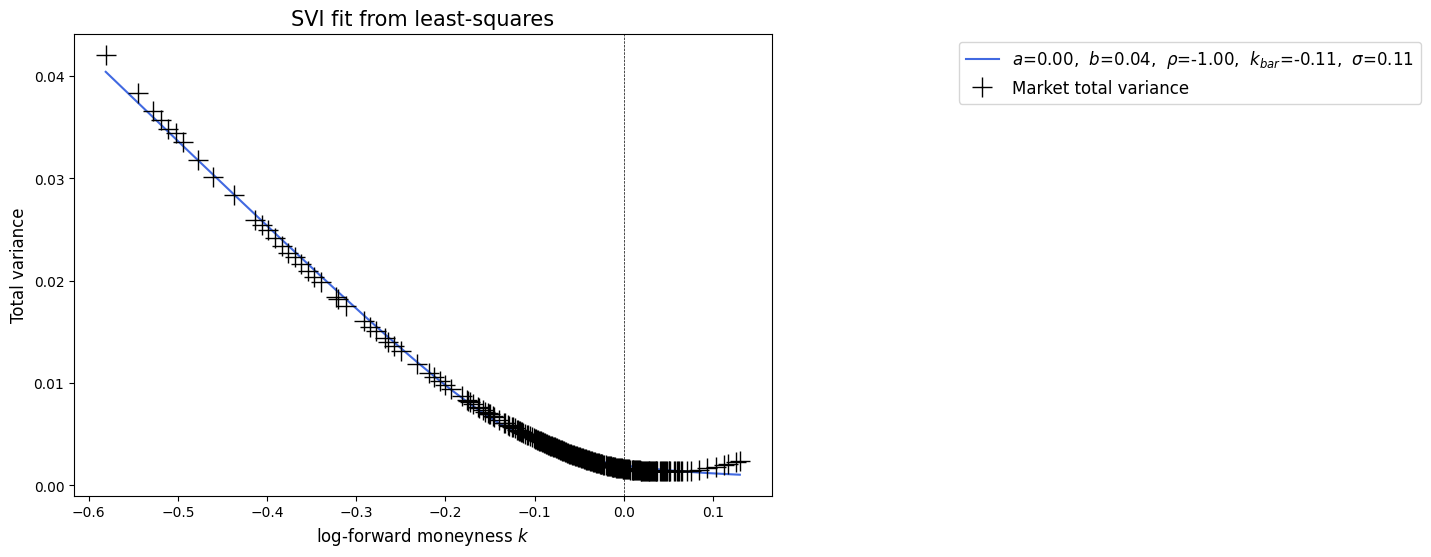

In [17]:
#######################################
## Plot of the calibrated SVI model
#######################################
total_variances_fit = SVI(mkt_log_mon, a_star, b_star, rho_star, k_bar_star, sig_star)

plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, total_variances_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, mkt_tot_variance ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market total variance")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Total variance", fontsize=12)
plt.title(r"SVI fit from least-squares", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

#### How does the result look like?

Have a look at the fit of implied volatility (as opposed to total variance):

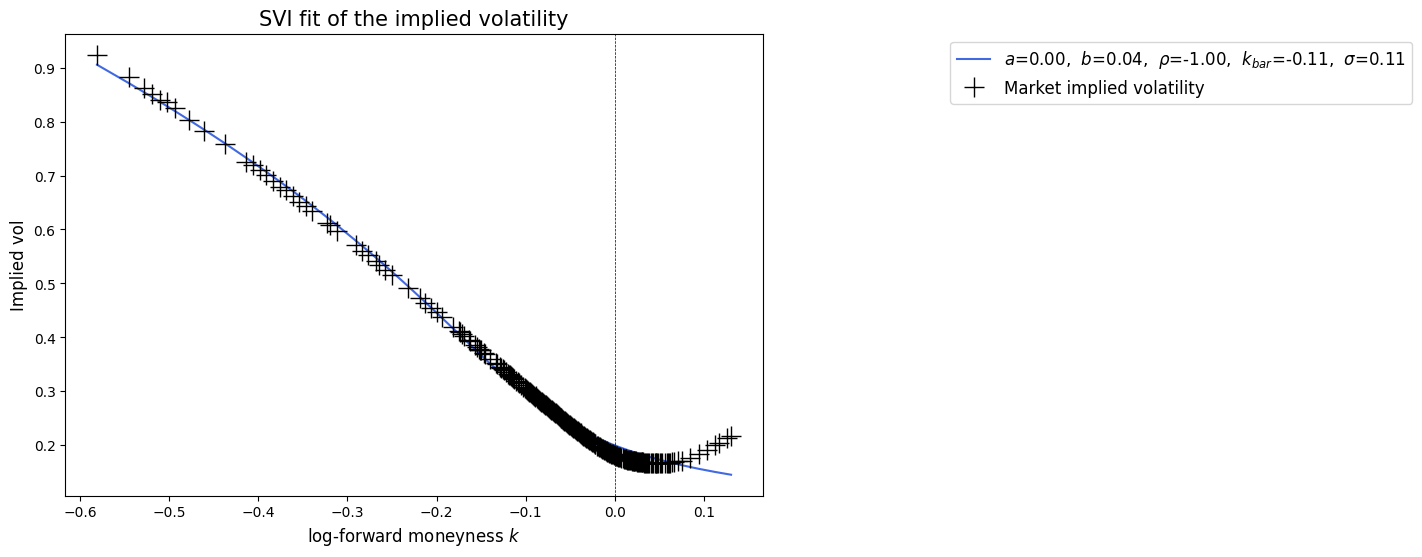

In [19]:
#####################################
## Plot of SVI fit of implied vol
#####################################
implied_vols_fit = np.sqrt(total_variances_fit / maturity)

plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, implied_vols_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, mkt_tot_variance**0.5 / np.sqrt(maturity) ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market implied volatility")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title(r"SVI fit of the implied volatility", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

$\blacktriangleright$ Zoom in on the zone around the money. Can you rerun the least square calibration with more emphasis on the accuracy around the at-the-money zone?

In [29]:
def SVI_two_arguments(theta, k):
    ## Attention à l'ordre des paramètres...
    a, b , rho, k_bar, sig = theta
    
    return SVI(k, a, b , rho, k_bar, sig)

# Loss function
def fct_least_squares_atm(theta, log_mon, tot_implied_variance):
    """
    theta                : the vector of SVI parameters
    log_mon              : log-forward moneyness k (float or double)
    tot_implied_variance : the target total implied variance (float or double)
    
    Returns : the objective function (without the square) to be injected
    in the least-square problem favoring the fit at-the-money (i.e. for log-mon = 0)
    """
    return (1/log_mon**2)*(SVI_two_arguments(theta, log_mon)- tot_implied_variance)

result_atm = opt.least_squares(fun = fct_least_squares_atm,
                           x0 = theta_init, 
                           bounds = SVI_param_bounds,
                           args = (mkt_log_mon, mkt_tot_variance), #additional arguments for the LS objective
                           verbose = 1)

## The optimized parameters
a_star, b_star, rho_star, k_bar_star, sig_star = result_atm.x

The maximum number of function evaluations is exceeded.
Function evaluations 500, initial cost 1.6512e+10, final cost 7.1873e+00, first-order optimality 6.31e+02.


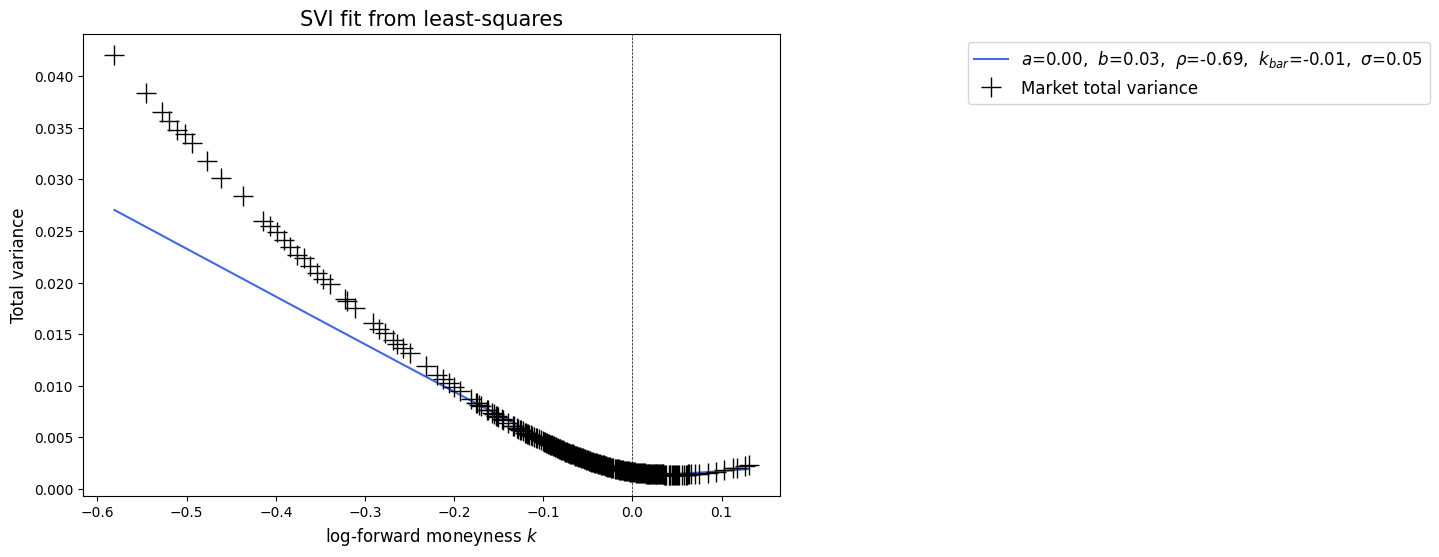

In [30]:
#######################################
## Plot of the calibrated SVI model
#######################################
total_variances_fit = SVI(mkt_log_mon, a_star, b_star, rho_star, k_bar_star, sig_star)

plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, total_variances_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, mkt_tot_variance ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market total variance")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Total variance", fontsize=12)
plt.title(r"SVI fit from least-squares", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

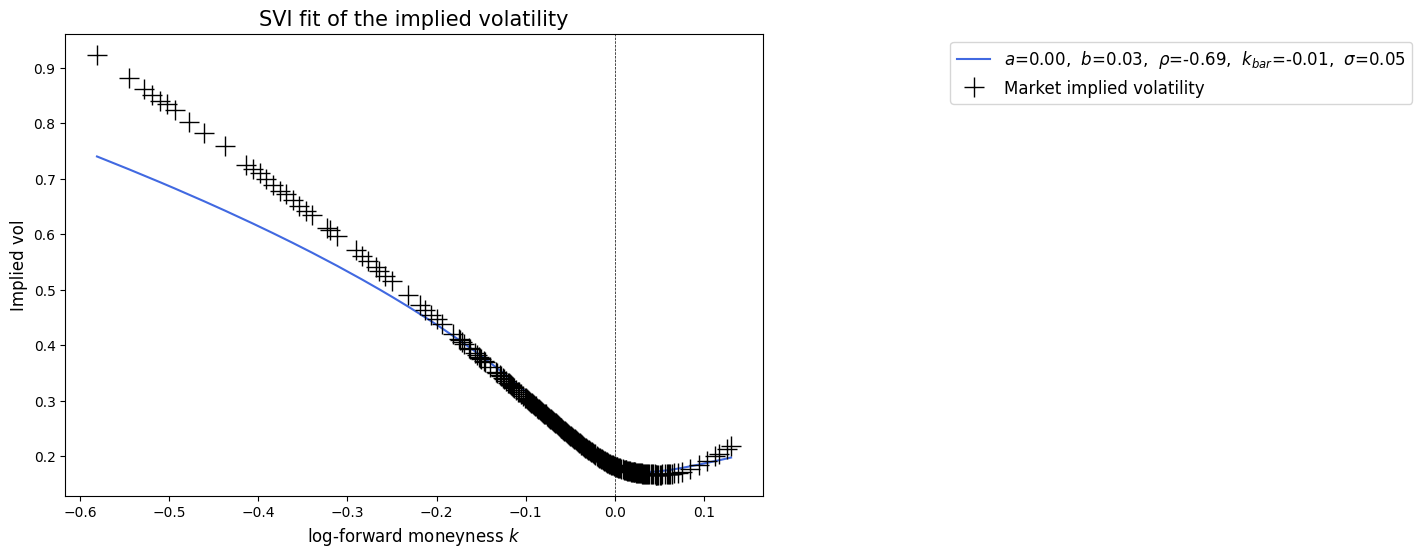

In [31]:
#####################################
## Plot of SVI fit of implied vol
#####################################
implied_vols_fit = np.sqrt(total_variances_fit / maturity)

plt.figure(figsize=(9,6))

plt.plot(mkt_log_mon, implied_vols_fit,
         color='royalblue', linewidth=1.5, 
         label=r"$a$=%1.2f,  $b$=%1.2f,  $\rho$=%1.2f,  $k_{bar}$=%1.2f,  $\sigma$=%1.2f" %(a_star, b_star, rho_star, k_bar_star, sig_star))

plt.plot(mkt_log_mon, mkt_tot_variance**0.5 / np.sqrt(maturity) ,
         color='black', linewidth=0., marker="+", markersize=14, label="Market implied volatility")

plt.axvline(0., linestyle="--", linewidth=0.5, color="k")

plt.xlabel(r"log-forward moneyness $k$", fontsize=12)
plt.ylabel("Implied vol", fontsize=12)
plt.title(r"SVI fit of the implied volatility", fontsize=15)

plt.legend(loc=9, fontsize=12, bbox_to_anchor=(1.6, 1.0), ncol=1)

#### $\blacktriangleright$  More data 

To go further, you could download other option quotes (on the SPX, or even some other underlying) from the [CBOE Delayed Quotes platform](https://www.cboe.com/delayed_quotes/spx/quote_table) and try the same SVI calibration as above.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#### $\blacktriangleright$  Pour aller plus loin (preprocessing des données et conditions de non-arbitrage) 

Il y a deux notebook additionnels

+ TP_market_implied_vol_SPX.ipynb : le notebook qui a été utilisé pour calculer les volatilités implicites contenues dans le fichier SPX_vol_quotes.csv à partir des prix d'options téléchargés de la plateforme du CBOE. 

+ TP_no_arbitrage_implied_vol.ipynb : contient une discussion et une analyse numérique des conditions de non-arbitrage sur la paramétrisation SVI.